# NY Restaurant Inspections

Goals<br>
You have been provided with a dataset containing inspection ratings for NYC restaurants. The structure of the files are normalized and contain various attributes regarding the restaurants and their inspections.
By design, this is an open-ended analysis. Feel free to identify trends, draw insights and recommendations (think: customer and/or inspector perspective). You are welcome to use any number of tools that you have at your disposal to complete this analysis. Because this is open-ended it is feasible that an analysis can take days if not weeks to consider all angles but for the sake of everyone's time we do not expect you spend more than 4 hours working on this. Remember that the purpose of this is to showcase your analytical skills. Please provide documentation of code cleaning and analysis (any code, scratch work, etc) - more info the better. This is great way for us to understand how you are thinking through the project.
Be as creative as you'd like but please be prudent with your time.<br><br>
Some assumptions about the project<br>
1. Potential customers would prefer to not get sick from the food they eat. But completely avoiding lower-grade restaurants might be an oversimplification. There are some tradeoffs to be considered here.<br>
2. There are a limited number of inspectors and inspections take time. Therefore the number of inspections is also limited.
3. Your stakeholders are looking to you for context and recommendations.<br>

# Import Packages

In [1]:
# import your packages you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import re 
%matplotlib inline

# Set up dataframe (import, concatenate, set index)

In [2]:
# use pandas to import data, this is a txt file but still takes commas as separates
part1=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_1_of_6.txt', sep=',', index_col=0)
part2=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_2_of_6.txt', sep=',', index_col=0)
part3=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_3_of_6.txt', sep=',', index_col=0)
part4=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_4_of_6.txt', sep=',', index_col=0)
part5=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_5_of_6.txt', sep=',', index_col=0)
part6=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\NYC_Restaurant_Inspections_data_folder\DOHMH_New_York_City_Restaurant_Inspection_Results_6_of_6.txt', sep=',', index_col=0)
#concatenate these together
restos=pd.concat([part1, part2, part3, part4, part5, part6])


In [3]:
restos.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [4]:
restos['CAMIS'].nunique()

26505

In [5]:
#convert to date time 
restos['INSPECTION DATE']=pd.to_datetime(restos['INSPECTION DATE'])
restos['RECORD DATE']=pd.to_datetime(restos['RECORD DATE'])

In [6]:
restos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399918 entries, 0 to 399917
Data columns (total 18 columns):
CAMIS                    399918 non-null int64
DBA                      399559 non-null object
BORO                     399918 non-null object
BUILDING                 399809 non-null object
STREET                   399909 non-null object
ZIPCODE                  399909 non-null float64
PHONE                    399913 non-null object
CUISINE DESCRIPTION      399918 non-null object
INSPECTION DATE          399918 non-null datetime64[ns]
ACTION                   398783 non-null object
VIOLATION CODE           393414 non-null object
VIOLATION DESCRIPTION    392939 non-null object
CRITICAL FLAG            399918 non-null object
SCORE                    376704 non-null float64
GRADE                    195413 non-null object
GRADE DATE               192820 non-null object
RECORD DATE              399918 non-null datetime64[ns]
INSPECTION TYPE          398783 non-null object
dtypes: 

In [7]:
restos.isna().sum()

CAMIS                         0
DBA                         359
BORO                          0
BUILDING                    109
STREET                        9
ZIPCODE                       9
PHONE                         5
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1135
VIOLATION CODE             6504
VIOLATION DESCRIPTION      6979
CRITICAL FLAG                 0
SCORE                     23214
GRADE                    204505
GRADE DATE               207098
RECORD DATE                   0
INSPECTION TYPE            1135
dtype: int64

Data should be set as multi index and also multiple rows per CAMIS for analysis (we will do this late), hence we can track how the scores change over time. That being said we should then sort by both the ID and inspection date

In [8]:
#sort by both the id and the inspection date
restos=restos.sort_values(['CAMIS', 'INSPECTION DATE'])

In [9]:
restos.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
78213,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2015-02-09,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,2017-08-28,Cycle Inspection / Initial Inspection
39514,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2016-02-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,2017-08-28,Cycle Inspection / Initial Inspection
399105,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2016-02-18,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,2017-08-28,Cycle Inspection / Initial Inspection
123432,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2017-05-18,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,2017-08-28,Cycle Inspection / Initial Inspection
351671,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2017-05-18,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,2017-08-28,Cycle Inspection / Initial Inspection


In [10]:
#drop duplicates by CAMIS to understand locations
locations=restos.drop_duplicates(subset=['CAMIS'], keep='first')

In [11]:
locations.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
78213,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2015-02-09,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,2017-08-28,Cycle Inspection / Initial Inspection
140332,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2014-07-01,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,23.0,B,07/01/2014,2017-08-28,Cycle Inspection / Re-inspection
123603,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2014-09-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,A,09/06/2014,2017-08-28,Cycle Inspection / Initial Inspection
5523,40356018,RIVIERA CATERERS,BROOKLYN,2780,STILLWELL AVENUE,11224.0,7183723031,American,2015-06-05,Violations were cited in the following area(s).,09A,Canned food product observed dented and not se...,Not Critical,4.0,A,06/05/2015,2017-08-28,Cycle Inspection / Initial Inspection
41645,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369.0,7183350505,American,2014-10-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaN,2017-08-28,Cycle Inspection / Initial Inspection


In [12]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26505 entries, 78213 to 77357
Data columns (total 18 columns):
CAMIS                    26505 non-null int64
DBA                      26146 non-null object
BORO                     26505 non-null object
BUILDING                 26485 non-null object
STREET                   26496 non-null object
ZIPCODE                  26496 non-null float64
PHONE                    26500 non-null object
CUISINE DESCRIPTION      26505 non-null object
INSPECTION DATE          26505 non-null datetime64[ns]
ACTION                   25370 non-null object
VIOLATION CODE           24542 non-null object
VIOLATION DESCRIPTION    24505 non-null object
CRITICAL FLAG            26505 non-null object
SCORE                    23990 non-null float64
GRADE                    11385 non-null object
GRADE DATE               10769 non-null object
RECORD DATE              26505 non-null datetime64[ns]
INSPECTION TYPE          25370 non-null object
dtypes: datetime64[ns](2

# EDA to understand data

In [13]:
#first, group by borough
locations.groupby('BORO').count()

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
BORO,,,,,,,,,,,,,,,,,
BRONX,2394,2364,2393,2394,2394,2394,2394,2394,2323,2249,2245,2394,2193,1144,1099,2394,2323
BROOKLYN,6524,6432,6524,6524,6524,6521,6524,6524,6223,6016,6010,6524,5844,2627,2433,6524,6223
MANHATTAN,10643,10519,10638,10643,10643,10643,10643,10643,10168,9806,9787,10643,9629,4742,4534,10643,10168
Missing,9,6,0,0,0,9,9,9,0,0,0,9,0,0,0,9,0
QUEENS,5982,5890,5977,5982,5982,5981,5982,5982,5742,5582,5574,5982,5453,2448,2305,5982,5742
STATEN ISLAND,953,935,953,953,953,952,953,953,914,889,889,953,871,424,398,953,914


In [14]:
#group by grade
restos.groupby('GRADE').count()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE DATE,RECORD DATE,INSPECTION TYPE
GRADE,,,,,,,,,,,,,,,,,
A,154194,154194,154194,154141,154194,154194,154194,154194,154194,154193,153417,153253,154194,154191,154193,154194,154193
B,28166,28166,28166,28164,28166,28166,28166,28166,28166,28166,28165,28143,28166,28166,28166,28166,28166
C,6992,6992,6992,6992,6992,6992,6992,6992,6992,6992,6963,6956,6992,6992,6992,6992,6992
Not Yet Graded,2598,2598,2598,2598,2598,2598,2598,2598,2598,2598,2577,2571,2598,2597,6,2598,2598
P,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1279,1279,1359,1359,1359,1359,1359
Z,2104,2104,2104,2101,2104,2104,2104,2104,2104,2104,2061,2058,2104,2104,2104,2104,2104


In [15]:
#check out how many zip codes
locations['ZIPCODE'].nunique()

233

In [16]:
restos['ACTION'].unique()

array(['Violations were cited in the following area(s).',
       'No violations were recorded at the time of this inspection.',
       'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.',
       'Establishment re-opened by DOHMH',
       'Establishment re-closed by DOHMH', nan], dtype=object)

In [17]:
#how many types of cuisine
restos['CUISINE DESCRIPTION'].nunique()

84

In [18]:
pd.crosstab(locations['CUISINE DESCRIPTION'], locations['BORO'], margins = True).head()

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,All
CUISINE DESCRIPTION,,,,,,,
Afghan,0,2,4,0,10,0,16
African,31,15,20,0,4,1,71
American,439,1297,3130,1,1020,220,6107
Armenian,1,9,17,0,8,1,36
Asian,5,76,151,0,125,10,367


In [19]:
pd.crosstab(restos['BORO'], restos['CRITICAL FLAG'], margins = True)

CRITICAL FLAG,Critical,Not Applicable,Not Critical,All
BORO,,,,
BRONX,19027,575,15293,34895
BROOKLYN,54030,1968,43600,99598
MANHATTAN,88496,2672,68406,159574
Missing,0,9,0,9
QUEENS,50945,1560,39910,92415
STATEN ISLAND,7584,195,5648,13427
All,220082,6979,172857,399918


In [20]:
pd.crosstab(restos['BORO'], restos['GRADE'], margins = True)

GRADE,A,B,C,Not Yet Graded,P,Z,All
BORO,,,,,,,
BRONX,13642,2790,682,225,163,168,17670
BROOKLYN,37354,6881,1694,771,377,500,47577
MANHATTAN,61949,10826,2732,856,470,849,77682
QUEENS,36014,6739,1684,633,306,486,45862
STATEN ISLAND,5235,930,200,113,43,101,6622
All,154194,28166,6992,2598,1359,2104,195413


In [21]:
res_xtab=pd.crosstab(restos['BORO'], restos['GRADE'])
res_xtab

GRADE,A,B,C,Not Yet Graded,P,Z
BORO,,,,,,
BRONX,13642,2790,682,225,163,168
BROOKLYN,37354,6881,1694,771,377,500
MANHATTAN,61949,10826,2732,856,470,849
QUEENS,36014,6739,1684,633,306,486
STATEN ISLAND,5235,930,200,113,43,101


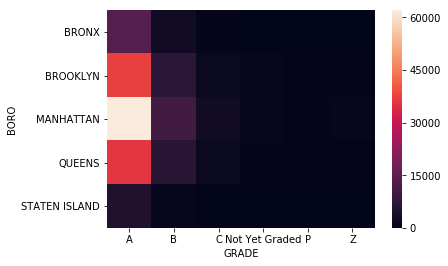

In [22]:
ax = sns.heatmap(res_xtab)

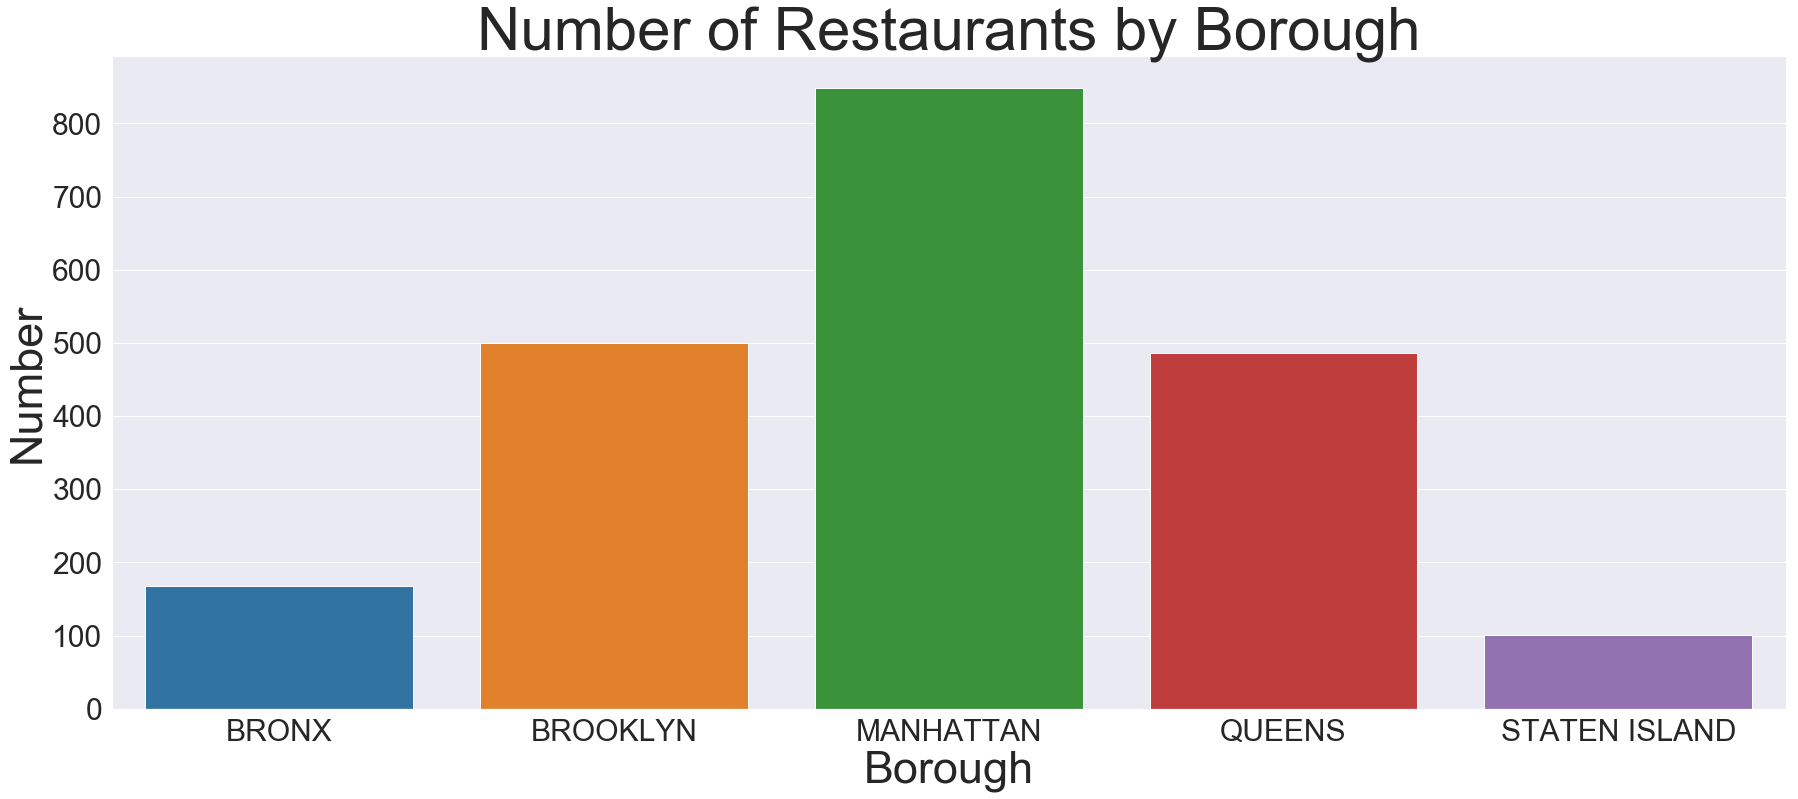

In [23]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x=res_xtab.index,y='Z', data=res_xtab)
ax.set_title("Number of Restaurants by Borough", fontsize=60)
ax.set_xlabel("Borough", fontsize=45)
ax.set_ylabel("Number", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("borough.png")

In [24]:
pd.crosstab(restos['GRADE'], restos['CRITICAL FLAG'], margins = True)

CRITICAL FLAG,Critical,Not Applicable,Not Critical,All
GRADE,,,,
A,75125,941,78128,154194
B,19178,23,8965,28166
C,4700,36,2256,6992
Not Yet Graded,1601,27,970,2598
P,329,80,950,1359
Z,1219,46,839,2104
All,102152,1153,92108,195413


In [25]:
#use random forest to predict grade if A,B,C
#linear regressionn to predict score?
pd.crosstab(restos['VIOLATION CODE'], restos['CRITICAL FLAG'], margins = True).head()

CRITICAL FLAG,Critical,Not Applicable,Not Critical,All
VIOLATION CODE,,,,
02A,288,0,0,288
02B,19650,0,0,19650
02C,475,0,0,475
02D,40,0,0,40
02E,4,0,0,4


In [26]:
gradedata=pd.DataFrame(restos.groupby('GRADE')['SCORE'].mean())
gradedata

,SCORE
GRADE,
A,9.799975
B,20.372577
C,35.904176
Not Yet Graded,34.442049
P,6.645327
Z,24.961977


In [27]:
gradestd=pd.DataFrame(restos.groupby('GRADE')['SCORE'].std())
gradestd

,SCORE
GRADE,
A,2.858276
B,3.937413
C,12.526578
Not Yet Graded,22.433505
P,4.767576
Z,14.251477


In [28]:
grades=pd.concat([gradedata, gradestd], axis=1)
grades.columns=['SCORE','STDEV']
grades

,SCORE,STDEV
GRADE,,
A,9.799975,2.858276
B,20.372577,3.937413
C,35.904176,12.526578
Not Yet Graded,34.442049,22.433505
P,6.645327,4.767576
Z,24.961977,14.251477


# An interesting find here
2 types of grade pending: P for pending a re-opening following a closure, and Z for grade pending. Those with grade Z have higher scores vs grade P and those with grade P have the lowest average score of all (across boroughs)<br>
On the bright side, the average score and distribution of grades does not differ by borough.

In [29]:
groupedata=pd.DataFrame(restos.groupby(['GRADE', 'BORO'])['SCORE'].mean())
groupedata=groupedata.reset_index()
groupedata

,GRADE,BORO,SCORE
0,A,BRONX,9.699802
1,A,BROOKLYN,9.839553
2,A,MANHATTAN,9.782531
3,A,QUEENS,9.801716
4,A,STATEN ISLAND,9.973066
5,B,BRONX,20.238351
6,B,BROOKLYN,20.271763
7,B,MANHATTAN,20.437188
8,B,QUEENS,20.423802
9,B,STATEN ISLAND,20.397849


In [30]:
#clean data: subset only the id, inspection date, score, drop duplicates, sort values, drop na
restos_test=restos[['CAMIS','INSPECTION DATE','SCORE', 'GRADE', 'BORO']]  #subset columns
restos_test=restos_test.drop_duplicates(keep='first')  #drop dupes
restos_test=restos_test.sort_values(['CAMIS', 'INSPECTION DATE'])  #sort
restos_test=restos_test.dropna()  #get rid of missings 

In [31]:
restos_test.shape

(85058, 5)

C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


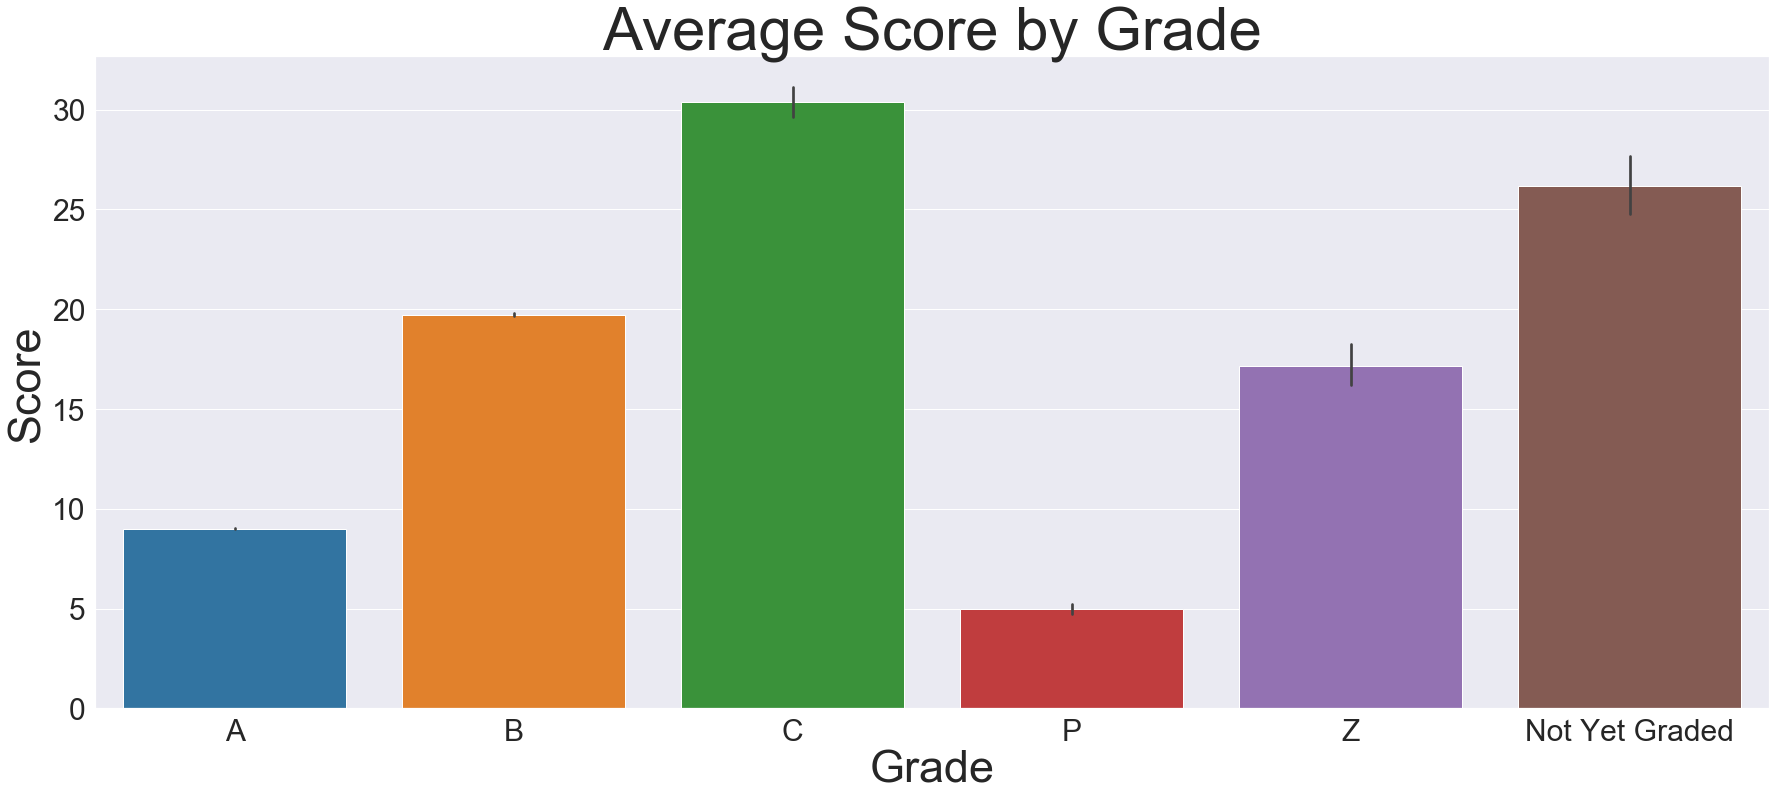

In [32]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x='GRADE',y='SCORE', data=restos_test)
ax.set_title("Average Score by Grade", fontsize=60)
ax.set_xlabel("Grade", fontsize=45)
ax.set_ylabel("Score", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("grade_score.png")

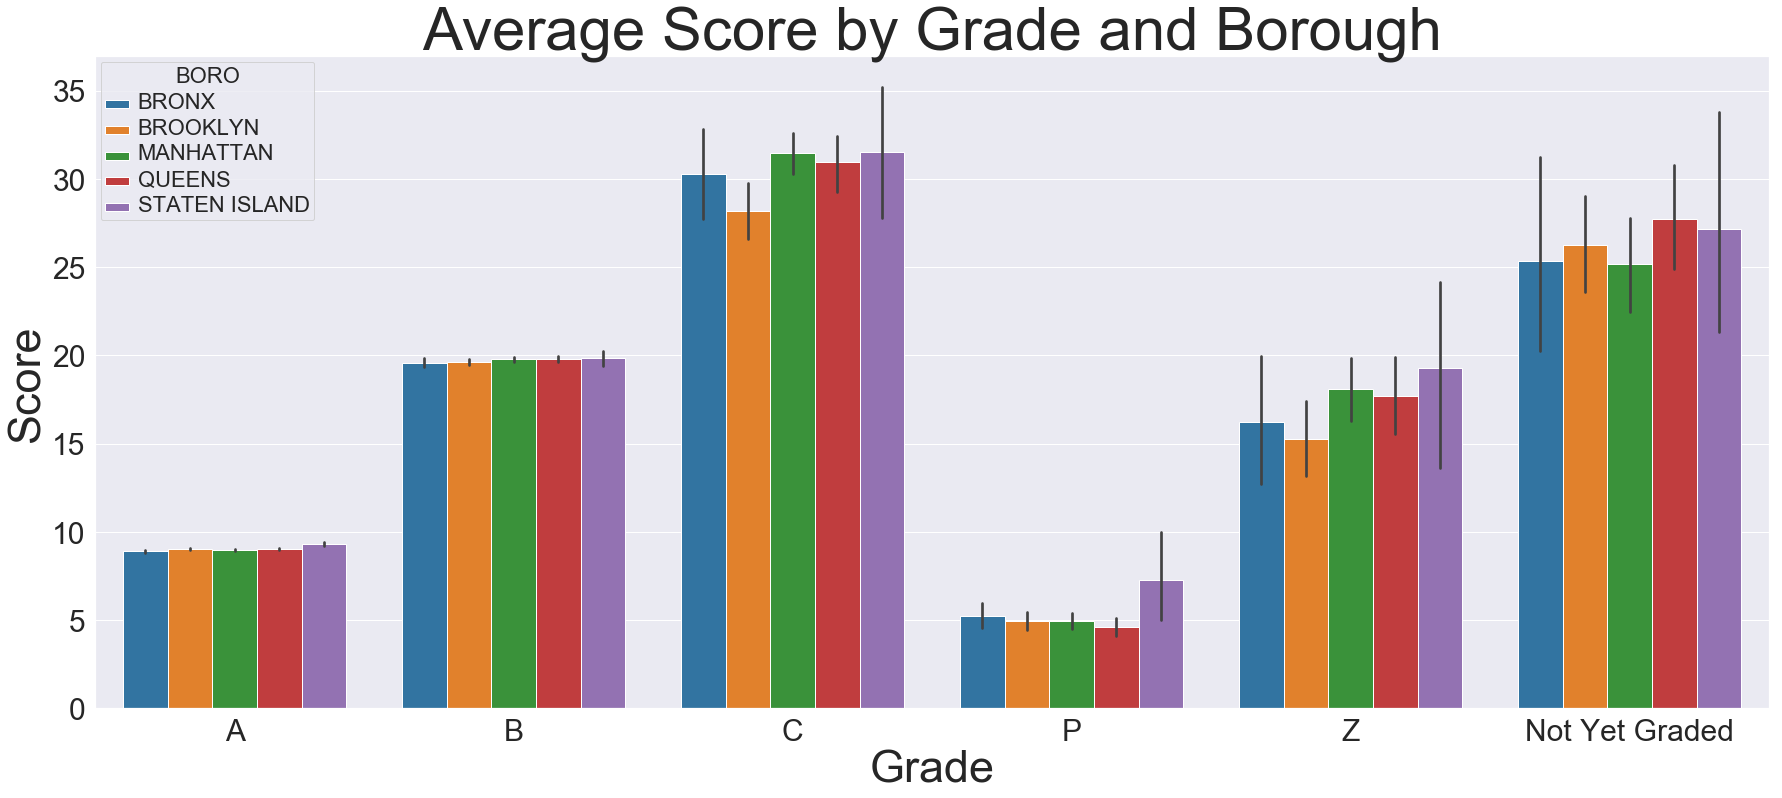

In [33]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x='GRADE',y='SCORE', hue='BORO', data=restos_test)
ax.set_title("Average Score by Grade and Borough", fontsize=60)
ax.set_xlabel("Grade", fontsize=45)
ax.set_ylabel("Score", fontsize=45)
ax.tick_params(labelsize=30)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.savefig("grade_borough.png")

In [34]:
boro_grade=pd.DataFrame(restos.groupby(['GRADE', 'BORO'])['SCORE'].count())
boro_grade=boro_grade.reset_index()
boro_grade.head()

,GRADE,BORO,SCORE
0,A,BRONX,13641
1,A,BROOKLYN,37352
2,A,MANHATTAN,61949
3,A,QUEENS,36014
4,A,STATEN ISLAND,5235


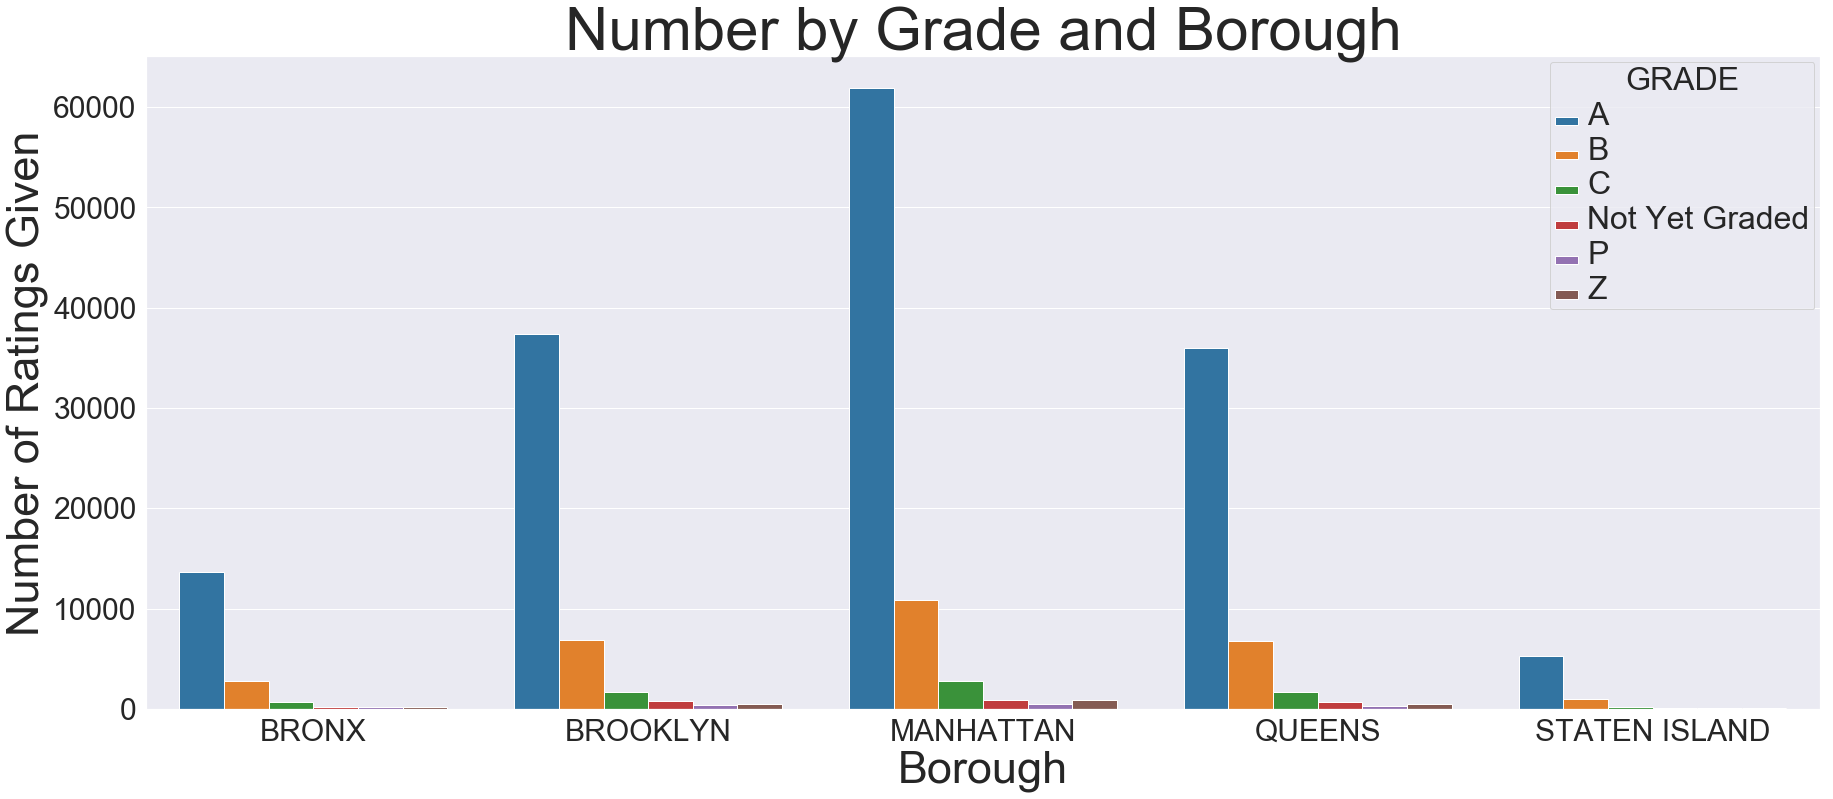

In [35]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x='BORO',y='SCORE', hue='GRADE', data=boro_grade)
ax.set_title("Number by Grade and Borough", fontsize=60)
ax.set_xlabel("Borough", fontsize=45)
ax.set_ylabel("Number of Ratings Given", fontsize=45)
ax.tick_params(labelsize=30)
plt.setp(ax.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.savefig("grade_borough2.png")

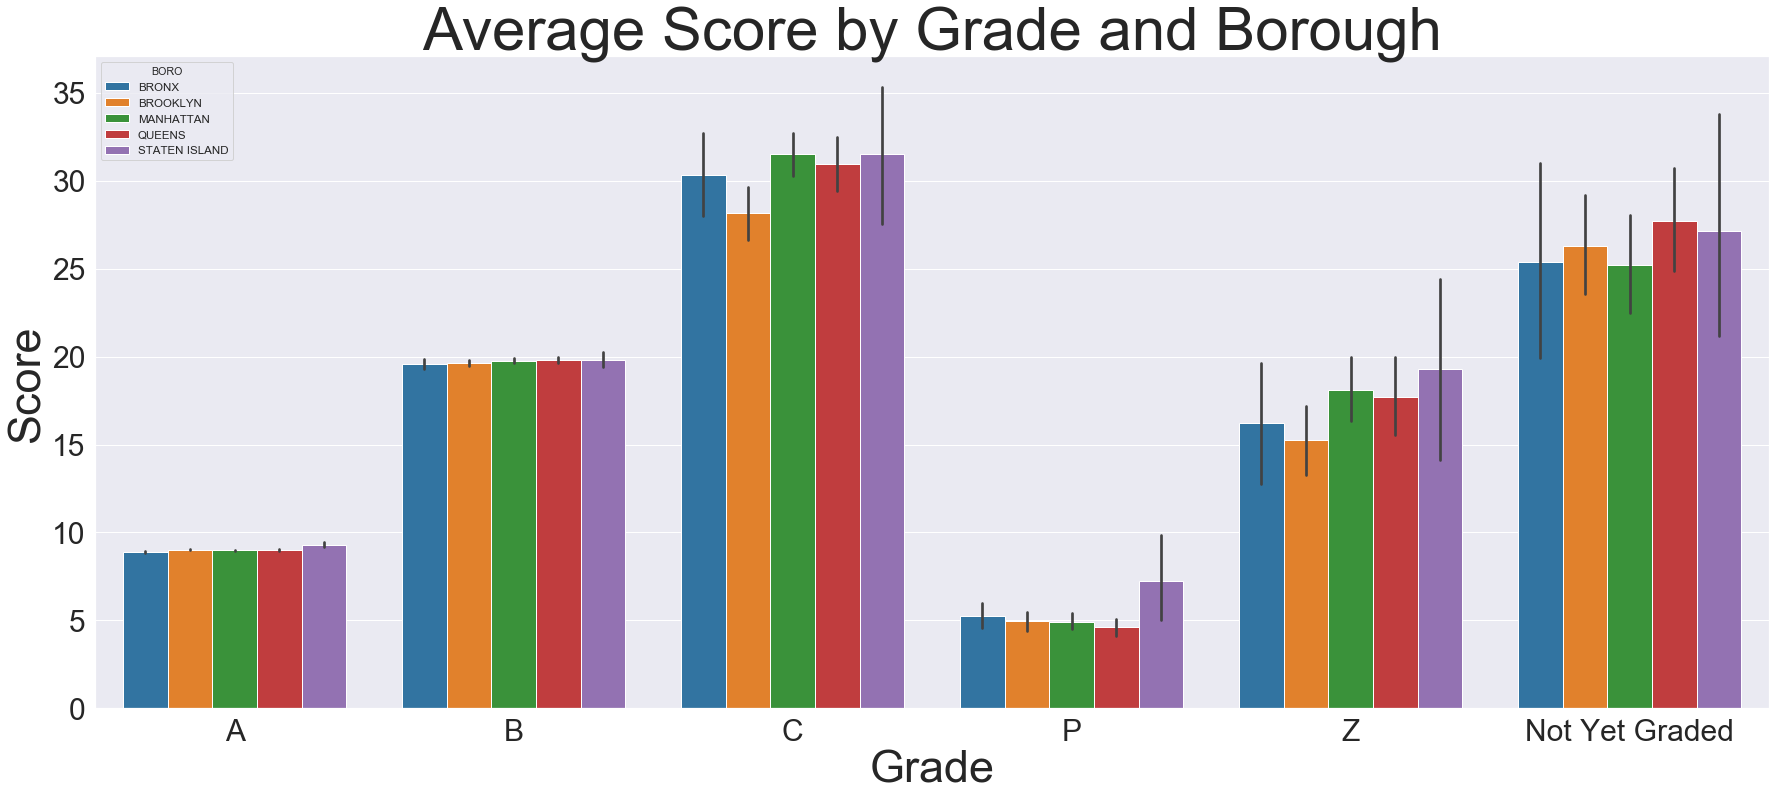

In [36]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x='GRADE',y='SCORE', hue='BORO', data=restos_test)
ax.set_title("Average Score by Grade and Borough", fontsize=60)
ax.set_xlabel("Grade", fontsize=45)
ax.set_ylabel("Score", fontsize=45)
ax.tick_params(labelsize=30)
#plt.savefig("grade_borough.png")

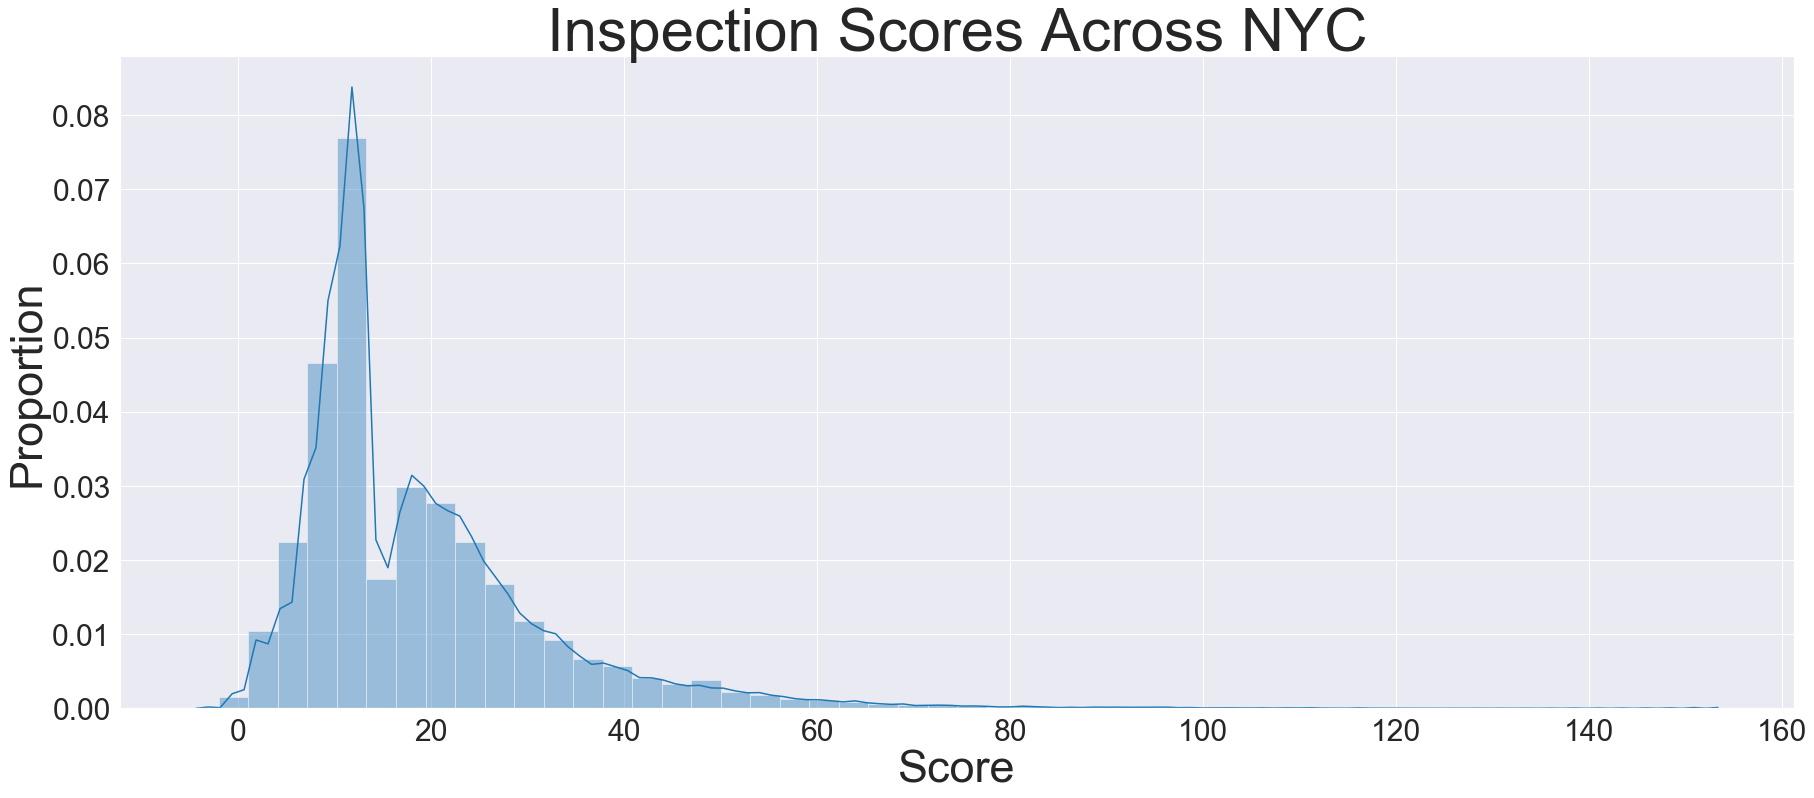

In [37]:
#have to drop missings first then make into distplot
score=restos['SCORE'].dropna()
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.distplot(score)
ax.set_title("Inspection Scores Across NYC", fontsize=60)
ax.set_xlabel("Score", fontsize=45)
ax.set_ylabel("Proportion", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("scores.png")

In [38]:
#locations of zip code and score
restos.groupby('ZIPCODE').mean().head()

,CAMIS,SCORE
ZIPCODE,,
10001.0,4.445788e+07,18.908554
10002.0,4.518074e+07,19.714524
10003.0,4.380698e+07,19.252150
10004.0,4.395996e+07,16.546597
10005.0,4.374306e+07,18.839196


# Most Restaurants are located in a few zip codes
What this means is that if an inspector wants to cover the most restaurants with limited resources, they can maximize restaurants covered by focusing on specific zip codes

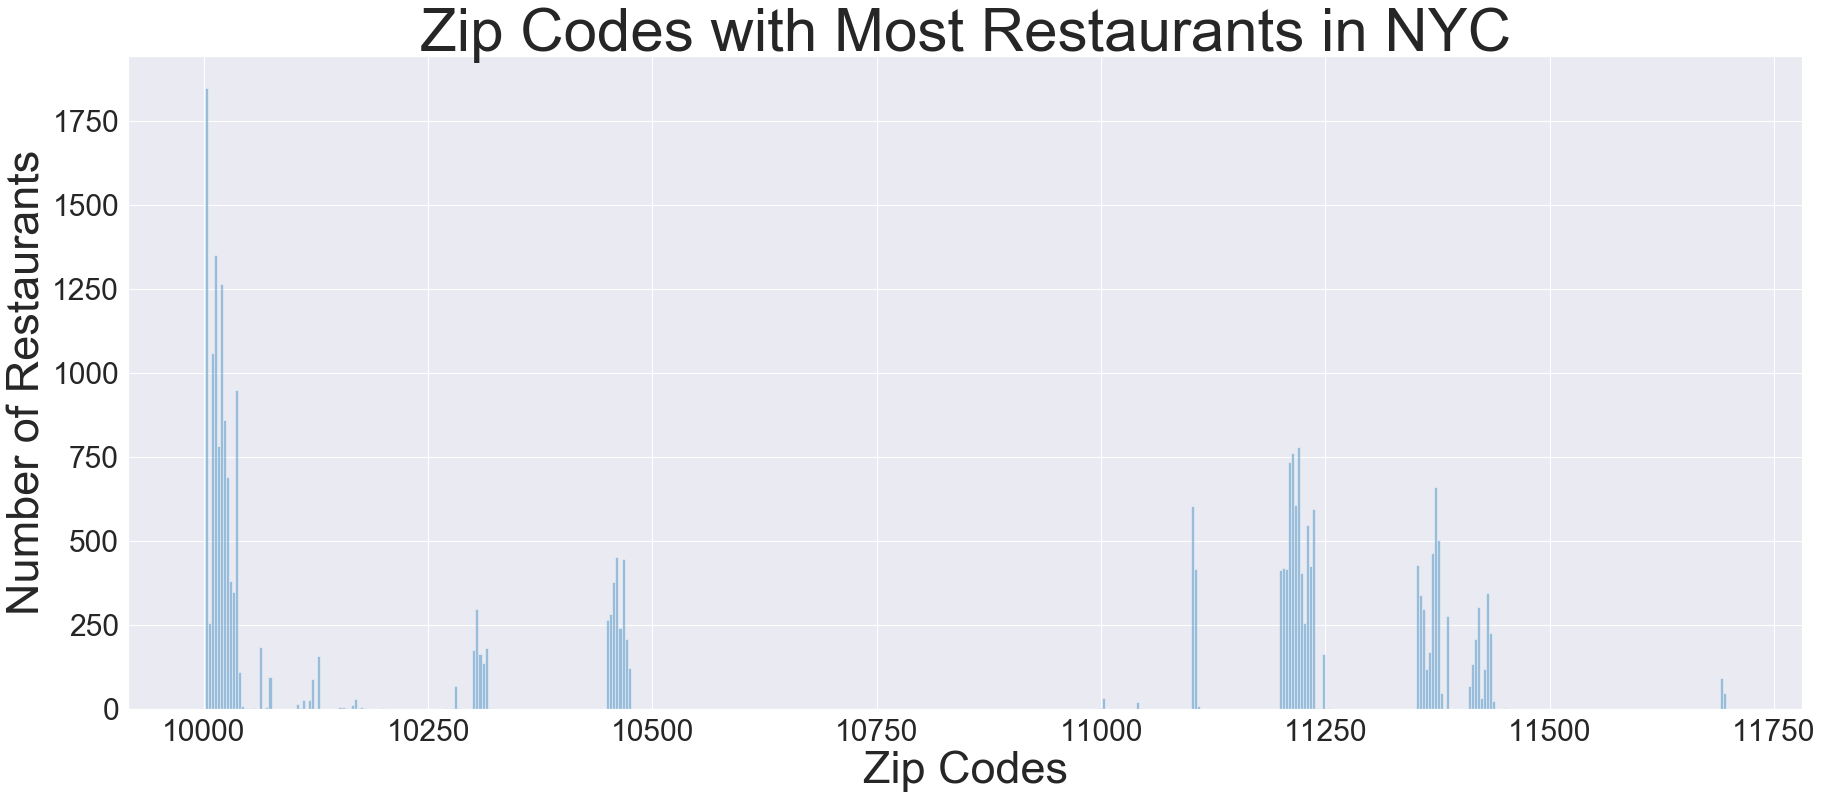

In [39]:
#histograms of zip codes
#have to drop missings first then make into distplot
zips=locations['ZIPCODE'].dropna()
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.distplot(zips, kde=False, bins=500)
ax.set_title("Zip Codes with Most Restaurants in NYC", fontsize=60)
ax.set_xlabel("Zip Codes", fontsize=45)
ax.set_ylabel("Number of Restaurants", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("byzips.png")

In [40]:
locations.describe()

,CAMIS,ZIPCODE,SCORE
count,2.650500e+04,26496.000000,23990.000000
mean,4.561725e+07,10665.567104,15.458066
std,4.418178e+06,596.636049,12.344212
min,3.007544e+07,10001.000000,-1.000000
25%,4.134505e+07,10022.000000,8.000000
50%,4.172178e+07,10466.000000,12.000000
75%,5.004401e+07,11229.000000,20.000000
max,5.006908e+07,11697.000000,151.000000


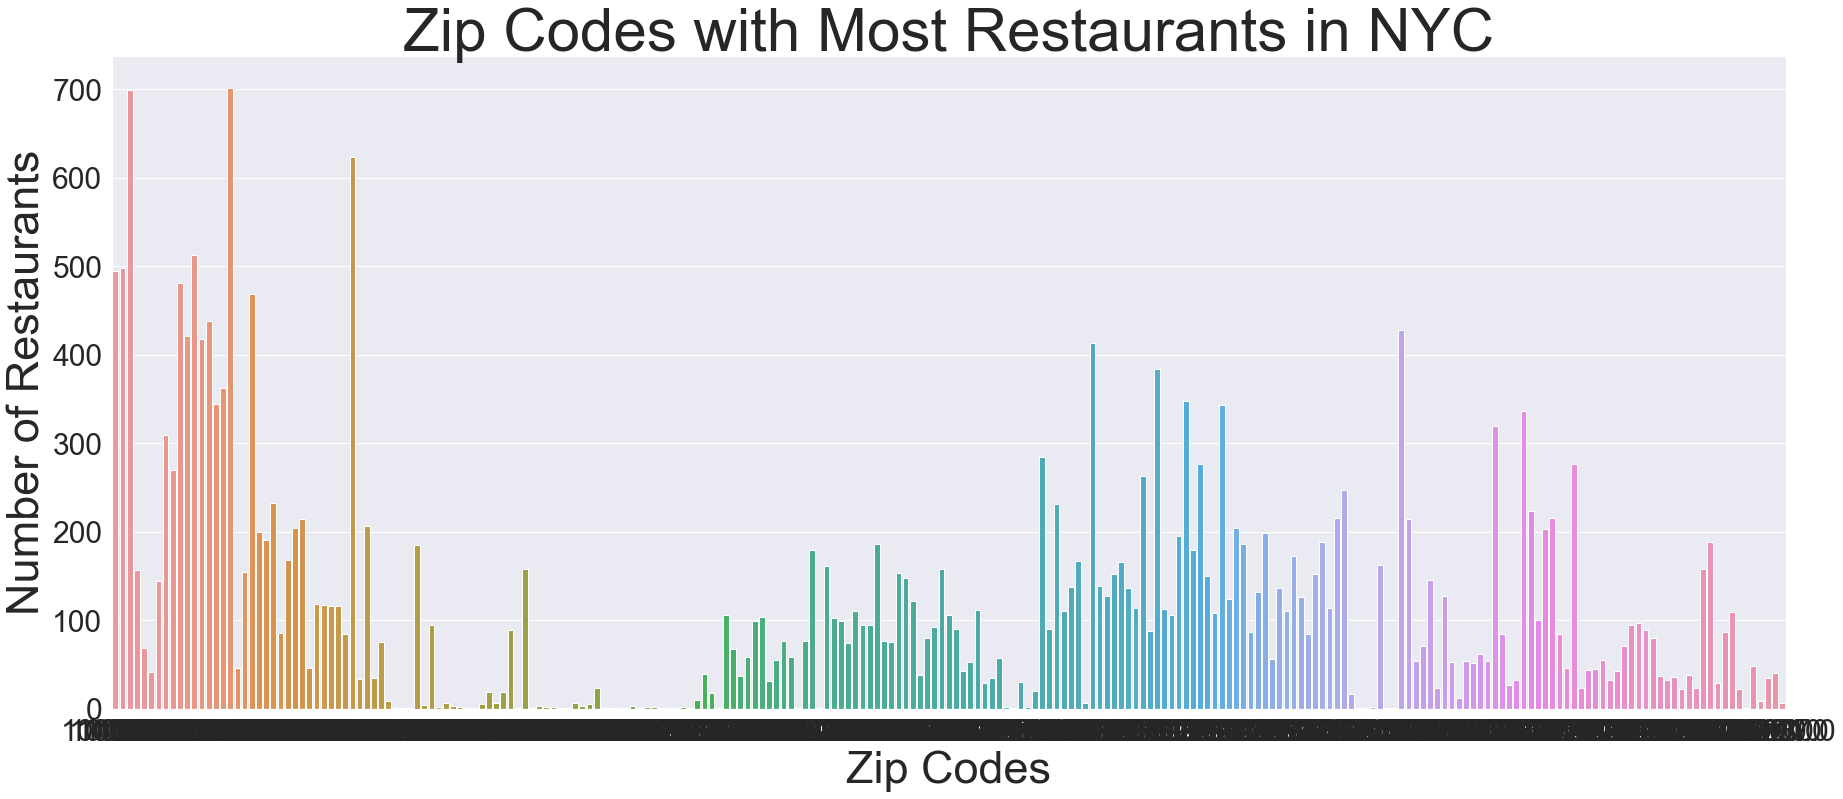

In [41]:
#histograms of zip codes
#have to drop missings first then make into distplot

sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.countplot(x='ZIPCODE', data=locations)
ax.set_title("Zip Codes with Most Restaurants in NYC", fontsize=60)
ax.set_xlabel("Zip Codes", fontsize=45)
ax.set_ylabel("Number of Restaurants", fontsize=45)
ax.tick_params(labelsize=30)
#plt.savefig("byzips.png")

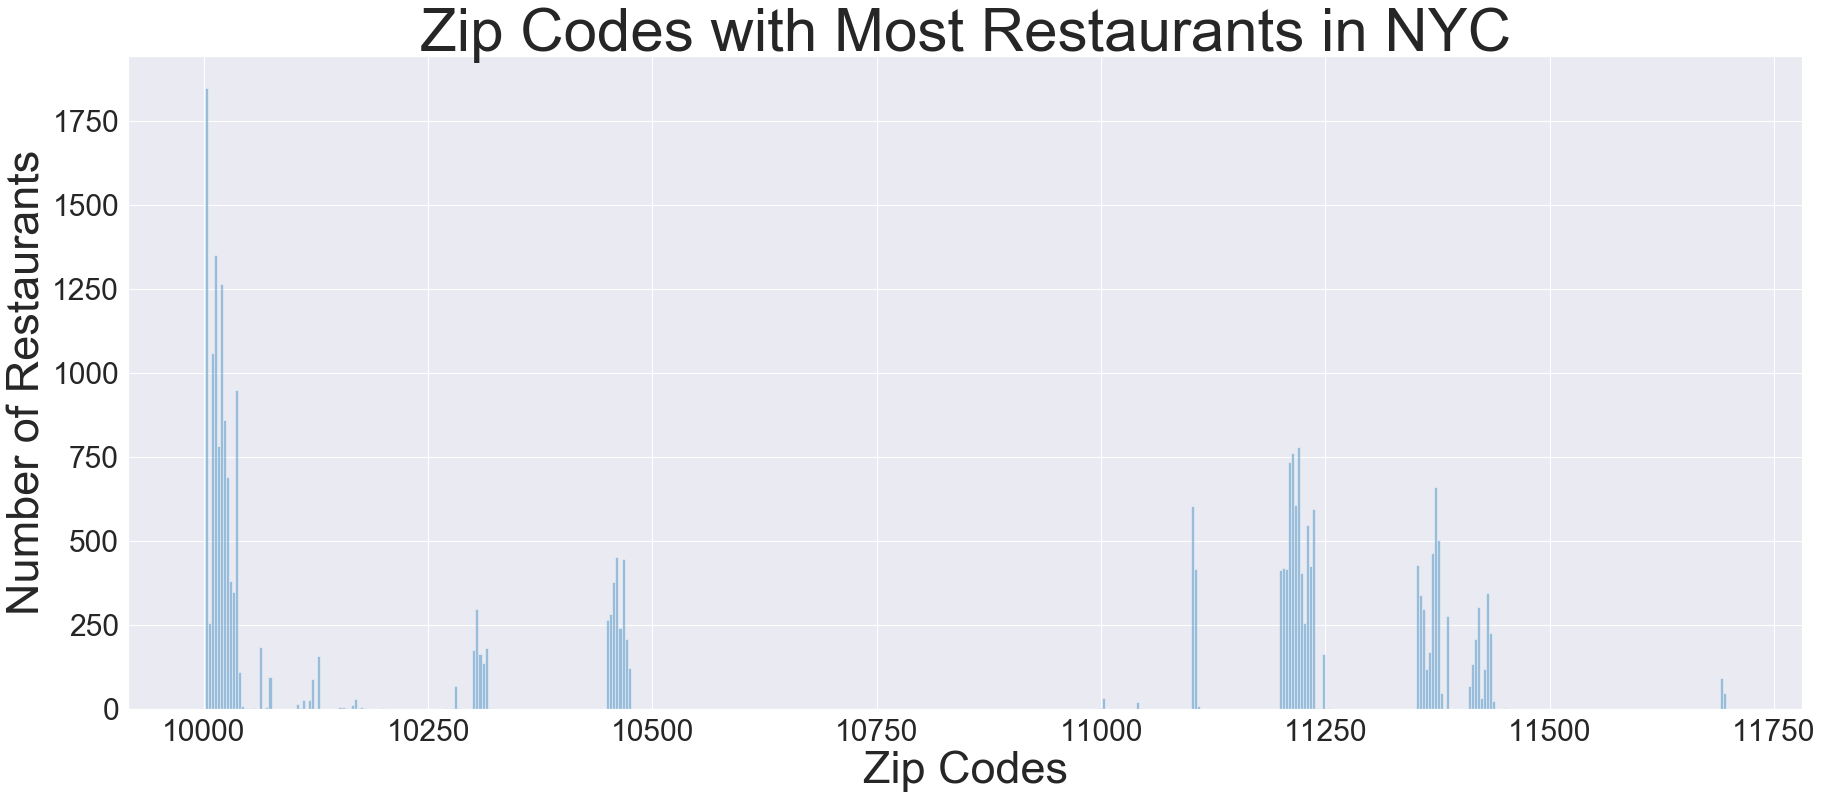

In [42]:
#histograms of zip codes
#have to drop missings first then make into distplot
zips=locations['ZIPCODE'].dropna()
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.distplot(zips, kde=False, bins=500)
ax.set_title("Zip Codes with Most Restaurants in NYC", fontsize=60)
ax.set_xlabel("Zip Codes", fontsize=45)
ax.set_ylabel("Number of Restaurants", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("byzips.png")

In [43]:
#which zip codes are the most common
locations.groupby('ZIPCODE').count().sort_values(by='CAMIS', ascending=False).head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
ZIPCODE,,,,,,,,,,,,,,,,,
10019.0,702,693,702,701,702,702,702,702,673,651,649,702,634,356,344,702,673
10003.0,699,696,699,699,699,699,699,699,678,653,652,699,625,299,288,699,678
10036.0,623,616,623,623,623,623,623,623,596,579,579,623,562,293,285,623,596
10013.0,513,507,513,512,513,513,513,513,493,467,464,513,461,208,193,513,493
10002.0,498,489,498,498,498,498,498,498,467,457,456,498,438,176,160,498,467


# doing this with geopandas

In [ ]:
#you can download this file here:
#https://data.cityofnewyork.us/widgets/i8iw-xf4u

In [53]:
#note: this doesnt work yet
import geopandas as gpd
file = 'data/zip_codes/ZIP_CODE_040114.shp'
map_df = gpd.read_file(file)
map_df.plot()

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sm = plt.cm.ScalarMappable(cmap='Blues')
sm._A = []
cbar = fig.colorbar(sm)
ax1.set_title('Public Health Violation Normalized Score')
ax1.axis('off')
map_df.plot(column='scores', cmap='Blues',linewidth=0.8, 
            ax=ax1, edgecolor='0.8')
plt.show()

# Next big question: How does a restaurant's score change across repeated inspections?
In order to answer this, we need to first set this as a multi index to take a random sample to plot out. Then to plot it out, we need to de-index it. But before we can do any of that, we need to take a sample, which is really just the first couple of observations and check them out. We also need to make the CAMIS id number an object.

In [44]:
restos_test.head()

,CAMIS,INSPECTION DATE,SCORE,GRADE,BORO
78213,30075445,2015-02-09,6.0,A,BRONX
39514,30075445,2016-02-18,10.0,A,BRONX
123432,30075445,2017-05-18,7.0,A,BRONX
140332,30112340,2014-07-01,23.0,B,BROOKLYN
19169,30112340,2014-12-30,8.0,A,BROOKLYN


In [51]:
#today in crazy, we will try this plot by line
#sns.set_style('darkgrid')
#paper_rc = {'lines.linewidth': 10, 'lines.markersize': 10} 
#sns.set_context("notebook", font_scale=1.05, rc = paper_rc)
#plt.figure(figsize=(30,12))
#ax=sns.lineplot(x='INSPECTION DATE', y='SCORE', hue='CAMIS', data=restos_test)
#ax.set_title("Scores Over Time (Sample)", fontsize=80)
#ax.set_xlabel("Inspection Date", fontsize=70)
#ax.set_ylabel("Score", fontsize=70)
#ax.tick_params(labelsize=25)
#plt.savefig(r'C:\Users\Laura\Documents\Insight 2019 Docs\lchange_scores.png')

# From an inspector's perspective
Those with grade pending (Z) or Not Yet Graded seem to have the highest scores and would merit the most re-inspections. The inspector would also want to cluster by zip code to most efficiently cover these restaurants. Let's find the zip codes with the most grade pending. Therefore, single out those with grade pending/not yet graded and look for the most common zip codes

In [46]:
pending_grades=restos[(restos['GRADE']=='Not Yet Graded') | (restos['GRADE']=='Z')]

In [47]:
pending_grades.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
30926,40366812,CARA MIA,QUEENS,22020,HILLSIDE AVENUE,11427.0,7187409118,Italian,2017-08-24,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,Z,08/24/2017,2017-08-28,Cycle Inspection / Re-inspection
72972,40366812,CARA MIA,QUEENS,22020,HILLSIDE AVENUE,11427.0,7187409118,Italian,2017-08-24,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,20.0,Z,08/24/2017,2017-08-28,Cycle Inspection / Re-inspection
75000,40366812,CARA MIA,QUEENS,22020,HILLSIDE AVENUE,11427.0,7187409118,Italian,2017-08-24,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,20.0,Z,08/24/2017,2017-08-28,Cycle Inspection / Re-inspection
125579,40367715,LA BONNE SOUPE BISTRO,MANHATTAN,48,WEST 55 STREET,10019.0,2125867650,French,2017-01-24,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,18.0,Z,01/24/2017,2017-08-28,Cycle Inspection / Re-inspection
136582,40367715,LA BONNE SOUPE BISTRO,MANHATTAN,48,WEST 55 STREET,10019.0,2125867650,French,2017-01-24,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,18.0,Z,01/24/2017,2017-08-28,Cycle Inspection / Re-inspection


In [48]:
#maybe  nnot the best way to look at this
pending_grades.groupby('ZIPCODE').count().sort_values(by='CAMIS', ascending=False).head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
ZIPCODE,,,,,,,,,,,,,,,,,
11372.0,133,133,133,133,133,133,133,133,133,132,132,133,133,133,103,133,133
11354.0,123,123,123,123,123,123,123,123,123,120,119,123,123,123,47,123,123
10013.0,120,120,120,120,120,120,120,120,120,117,115,120,120,120,79,120,120
10002.0,109,109,109,109,109,109,109,109,109,107,107,109,109,109,47,109,109
10003.0,102,102,102,102,102,102,102,102,102,100,100,102,102,102,36,102,102


In [49]:
#way better
zips=pd.crosstab(pending_grades['ZIPCODE'], pending_grades['GRADE'])
zips['total']=zips['Not Yet Graded']+zips['Z']
zips=zips.sort_values(by='total', ascending=False).head(10)
zips

GRADE,Not Yet Graded,Z,total
ZIPCODE,,,
11372.0,30,103,133
11354.0,76,47,123
10013.0,41,79,120
10002.0,62,47,109
10003.0,66,36,102
10011.0,51,50,101
11201.0,72,27,99
11220.0,66,29,95
10019.0,46,43,89


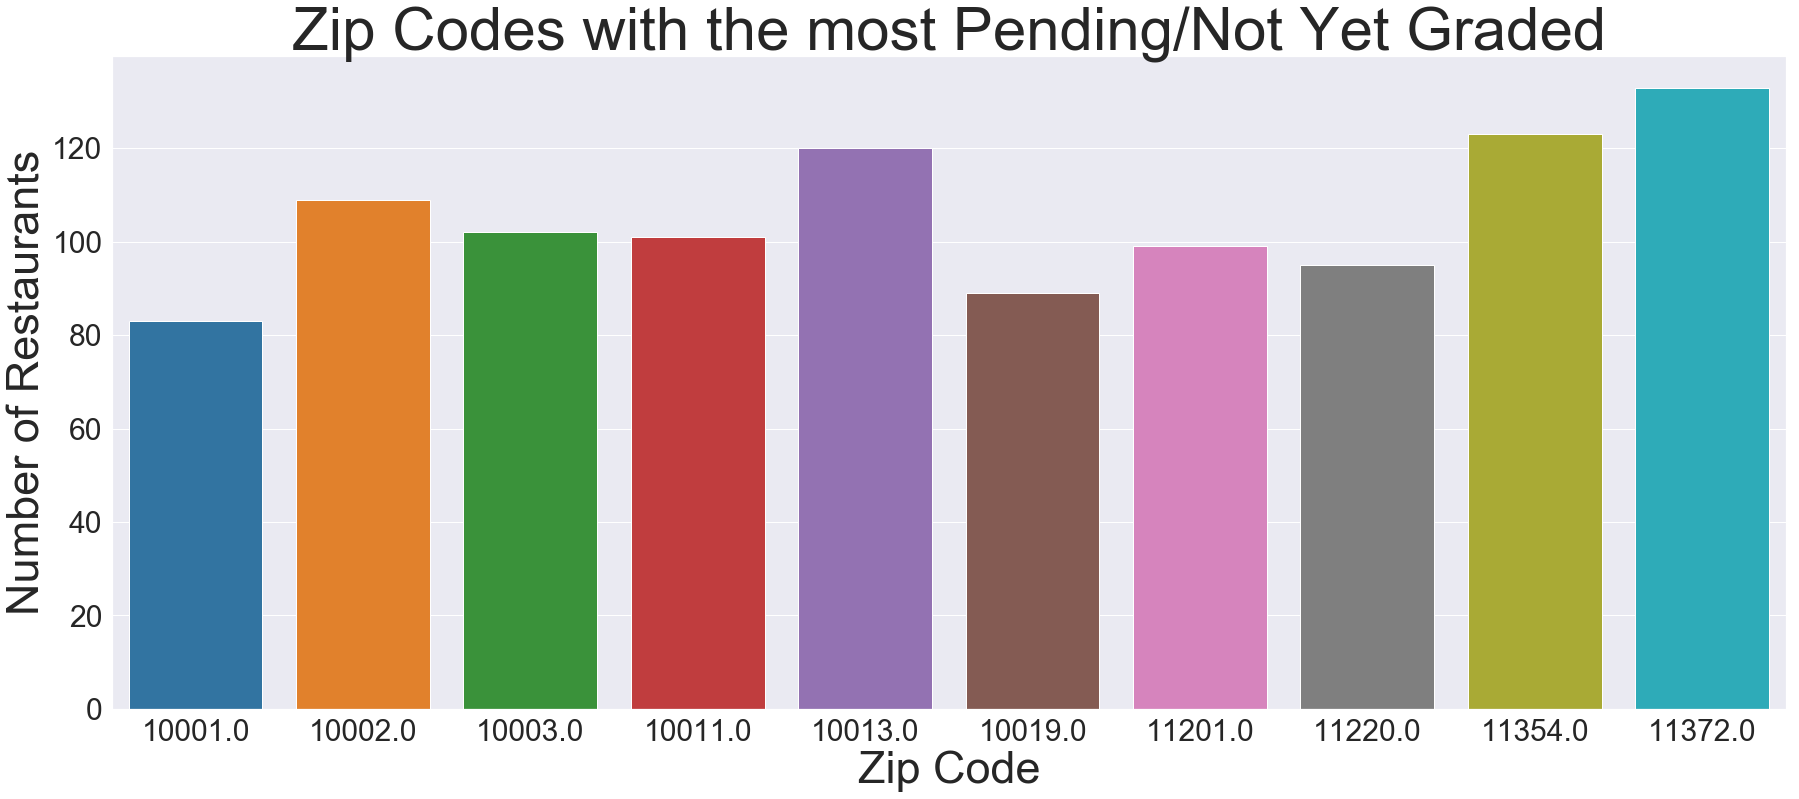

In [50]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.barplot(x=zips.index ,y='total', data=zips)
ax.set_title("Zip Codes with the most Pending/Not Yet Graded", fontsize=60)
ax.set_xlabel("Zip Code", fontsize=45)
ax.set_ylabel("Number of Restaurants", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("important_zips.png")